In [1]:
#in His Name"

نصب و فراخوانی ماژول‌های 
- `numpy` برای انجام عملیات آرایه‌ای
- `matplotlib` برای تصویر سازی داده
- `sklearn` برای استفاده از توابع موردنیاز برای تبدیل
- `mpld3` برای تصویرسازی تعاملی داده

In [1]:
!pip install numpy
!pip install matplotlib==2.0.2
!pip install sklearn
!pip install mpld3

    ERROR: Command errored out with exit status 1:
     command: 'c:\users\mahta\appdata\local\programs\python\python37-32\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mahta\\AppData\\Local\\Temp\\pip-install-13hiyu9g\\matplotlib\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mahta\\AppData\\Local\\Temp\\pip-install-13hiyu9g\\matplotlib\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Mahta\AppData\Local\Temp\pip-install-13hiyu9g\matplotlib\pip-egg-info'
         cwd: C:\Users\Mahta\AppData\Local\Temp\pip-install-13hiyu9g\matplotlib\
    Complete output (63 lines):
    Edit setup.cfg to change the build options
    
    BUILDING MATPLOTLIB
                matplotlib: yes [2.0.2]
                    python: yes [3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019,
                            19:29:22) [MSC v.1916

    Running setup.py install for mpld3: started
    Running setup.py install for mpld3: finished with status 'done'


In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from sklearn import datasets

import mpld3
from mpld3 import plugins

دسترسی به مجموعه داده اعداد دست نویس

In [3]:
digits = datasets.load_digits()

In [4]:
x = digits.data
y = digits.target

اعمال تبدیل  
TSNE نکته مهم درباره تابع 
- `init='pca'`
- `random_state=0`

`این دو ورودی از تابع را با مقادیر مشخص شده، مقداردهی نمایید`

In [5]:
def tsne(x):
    x_tsne = TSNE(n_components=2, init='pca', random_state=0).fit_transform(x)
    return x_tsne

In [6]:
x_tsne = tsne(x)

رسم نمودار داده بعد از اعمال تبدیل

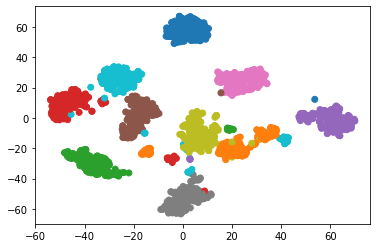

In [7]:
colors = list(matplotlib.colors.TABLEAU_COLORS)

label_colors = []
for idx in y:
    label_colors.append(colors[idx])
    
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=label_colors)

رسم نمودار تعاملی داده بعد از اعمال تبدیل

In [8]:
x_for_plot = []
for i in range(10):
    x_for_plot.append(x_tsne[y==i])

In [9]:
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)


for i in range(10):
    ax.scatter(x_for_plot[i][:,0], x_for_plot[i][:,1], c=label_colors[i], label=i)
    
#define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)

plugins.connect(fig, interactive_legend)


mpld3.enable_notebook()
mpld3.display()

c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\mpld3\plugins.py:675: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(entry, collections.Iterable):


TypeError: Object of type ndarray is not JSON serializable